<a href="https://colab.research.google.com/github/DENGCPU/TensorFlow-Study/blob/main/2_%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from __future__ import absolute_import,division,print_function

import tensorflow as tf
import numpy as np
rng = np.random

#参数
learning_rate = 0.01
training_step = 1000
display_step = 50

# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

# 权重和偏差，随机初始化
W  = tf.Variable(rng.randn(), name = 'weight')
b = tf.Variable(rng.randn(), name='bias')

# 线性回归 Wx+b
def linear_regression(x):
  return W * x + b
# 平方差
def mean_square(y_pred,y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true))

# 随机梯度下降优化器
optimizer = tf.optimizers.SGD(learning_rate)

# 优化过程
def run_optimization():
  # 将计算过程包装在GradientTape内以自动微分
  with tf.GradientTape() as g:
    pred = linear_regression(X)
    loss = mean_square(pred, Y)
  #计算梯度
  gradients = g.gradient(loss, [W,b])
  # 更新W和b
  optimizer.apply_gradients(zip(gradients, [W,b]))

# 执行训练
for step in range(1, training_step+1):
  run_optimization()

  if step % display_step == 0:
    pred = linear_regression(X)
    loss = mean_square(pred,Y)
    print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.155975, W: 0.270080, b: 0.668031
step: 100, loss: 0.155518, W: 0.267970, b: 0.682996
step: 150, loss: 0.155160, W: 0.266100, b: 0.696249
step: 200, loss: 0.154879, W: 0.264445, b: 0.707984
step: 250, loss: 0.154658, W: 0.262979, b: 0.718377
step: 300, loss: 0.154486, W: 0.261681, b: 0.727581
step: 350, loss: 0.154350, W: 0.260531, b: 0.735731
step: 400, loss: 0.154244, W: 0.259513, b: 0.742948
step: 450, loss: 0.154161, W: 0.258612, b: 0.749340
step: 500, loss: 0.154095, W: 0.257813, b: 0.755000
step: 550, loss: 0.154044, W: 0.257106, b: 0.760013
step: 600, loss: 0.154004, W: 0.256480, b: 0.764451
step: 650, loss: 0.153972, W: 0.255926, b: 0.768382
step: 700, loss: 0.153948, W: 0.255435, b: 0.771863
step: 750, loss: 0.153928, W: 0.255000, b: 0.774946
step: 800, loss: 0.153913, W: 0.254615, b: 0.777676
step: 850, loss: 0.153901, W: 0.254274, b: 0.780094
step: 900, loss: 0.153892, W: 0.253972, b: 0.782234
step: 950, loss: 0.153884, W: 0.253704, b: 0.784130
step: 1000, l

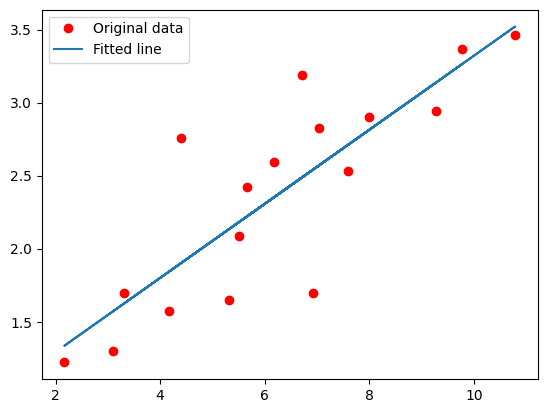

In [7]:
import matplotlib.pyplot as plt
plt.plot(X,Y,'ro', label='Original data')
plt.plot(X,np.array(W*X+b),label='Fitted line')
plt.legend()
plt.show()